# Unsupervised learning with K-Means

### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm


### Reading data from csv

In [3]:
df=pd.read_csv('mushrooms.csv')

### Exploratory Data Analysis:

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Function to map categorical features to integral values

In [5]:
def Encoder(val):
    if val in category:
        return category[val]
    else:
        category[val]=len(category)
    return category[val]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

No missing values

In [7]:
df.shape

(8124, 23)

Encoder at work

In [8]:
for i in range(df.shape[1]):
    category={}
    df.iloc[:,i]=df.iloc[:,i].apply(Encoder)

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


Now since we are doing unsupervised clustering analysis here thus, dropping class column

In [10]:
X=df.drop('class',axis=1)

In [11]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,2
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,0,1,1,2,1


Converting all the features and extracting just 2 principle components for scatter plot analysis

In [12]:
pca = PCA(n_components=2).fit(X)

In [13]:
pca_2d = pca.transform(X)

## Trying different values of K and plotting Total within-cluster sum of squares and Average silhouette score for each value of K
To find appropriate value of K

In [14]:
twss=[]
sa=[]

In [15]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init= 'k-means++')
    kmeans.fit(X)
    Ypreds=kmeans.predict(X)
    twss.append(kmeans.inertia_)
    if i>1:
        sa.append(silhouette_score(X, Ypreds))

Text(0, 0.5, 'Total within-cluster sum of squares')

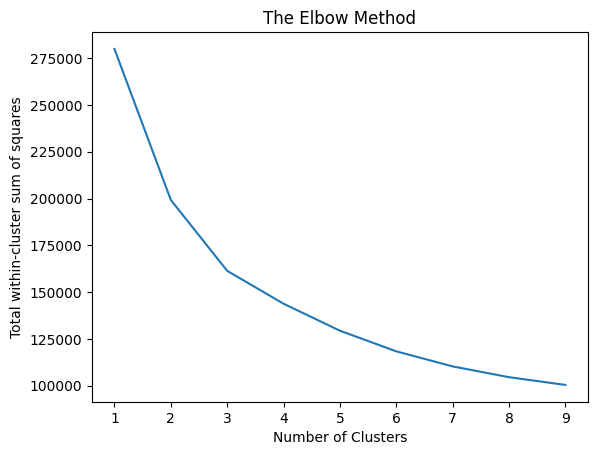

In [16]:
plt.plot(range(1,10),twss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within-cluster sum of squares')

Text(0, 0.5, 'Average silhouette score')

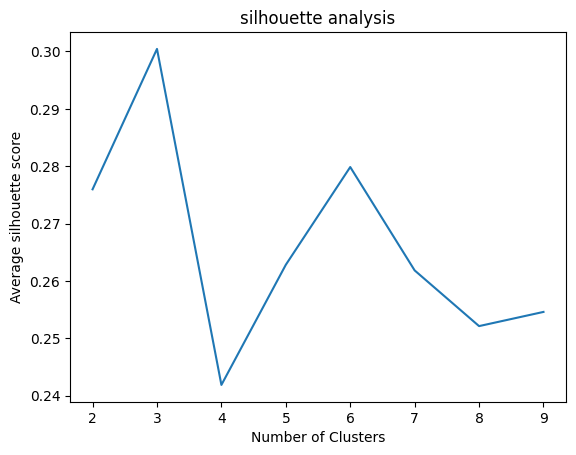

In [17]:
plt.plot(range(2,10),sa)
plt.title('silhouette analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Average silhouette score')

Above observations suggest k=3 but since we already know that there are only two clusters here edible and poisonous mushrooms then why the above results say otherwise?

## By plotting silhouettes this problem can be solved : 
Because we don't choose the k with just the highest silhouette score , silhouette samples should be uniform as well 

For n_clusters = 2 The average silhouette_score is : 0.2759657250771089


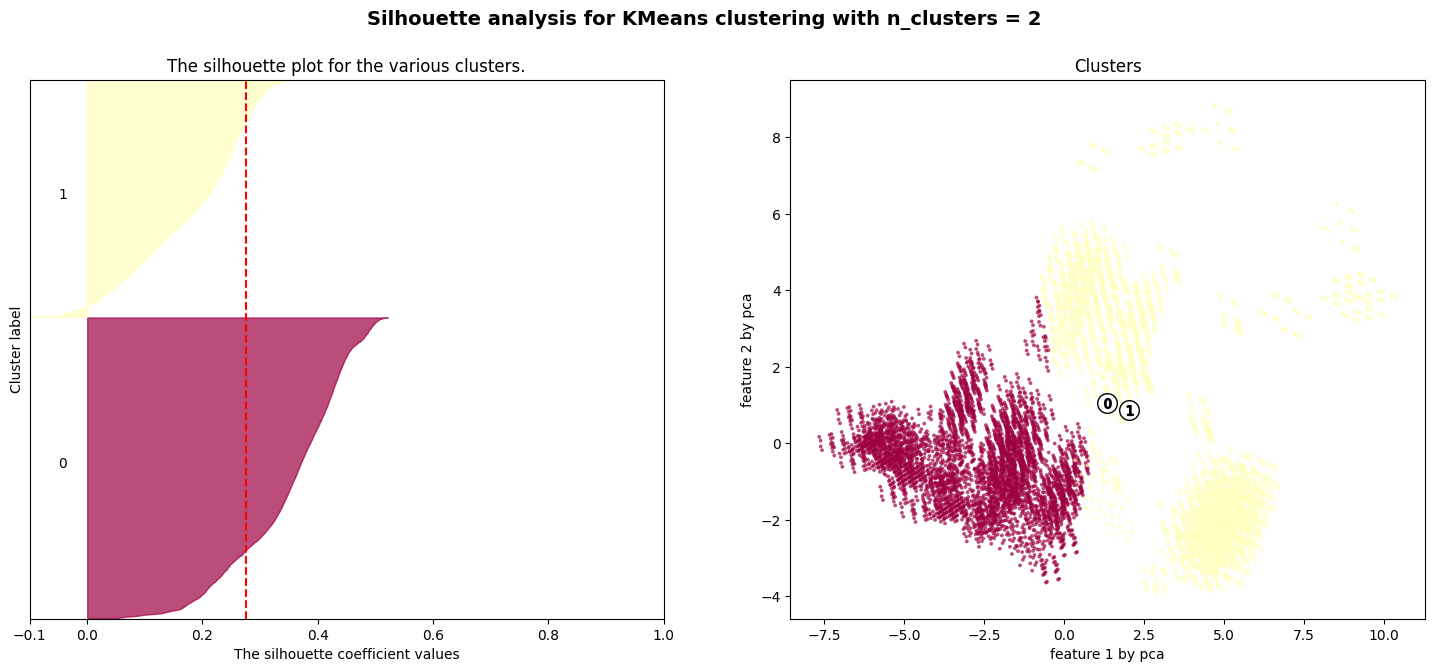

For n_clusters = 3 The average silhouette_score is : 0.30044042409448424


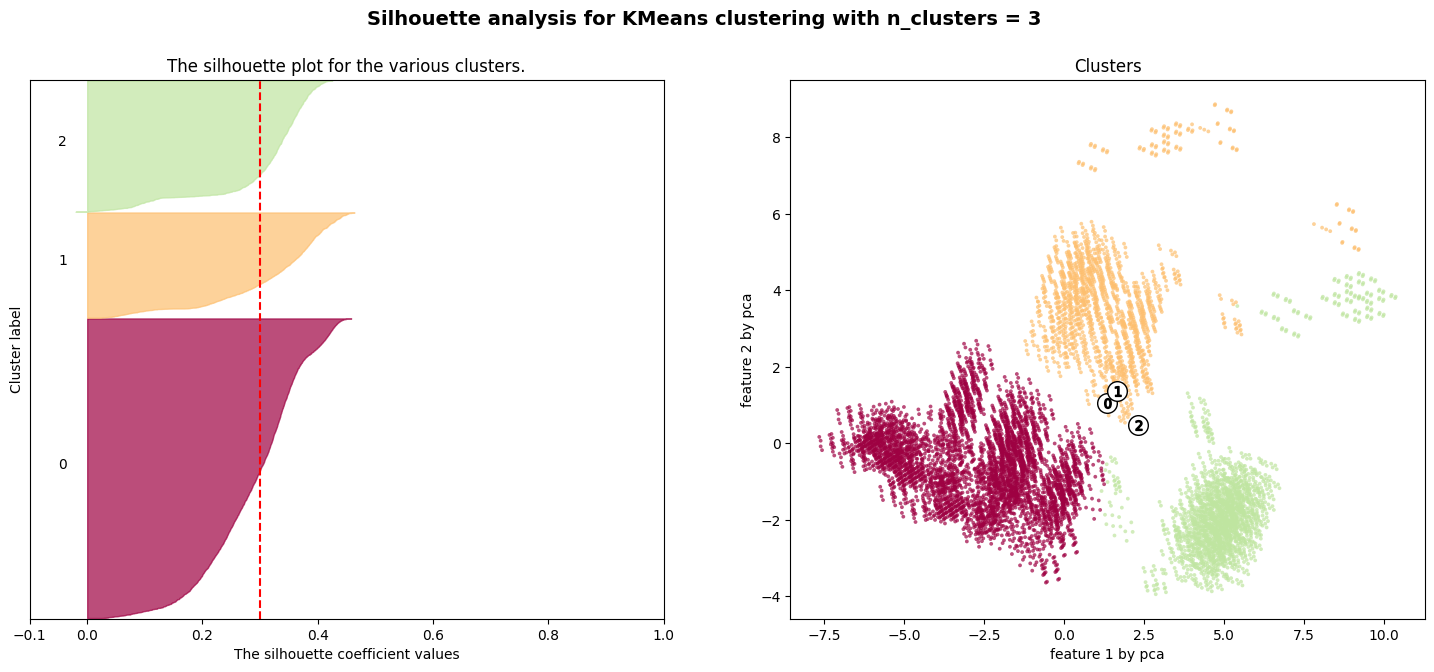

For n_clusters = 4 The average silhouette_score is : 0.2418557587751939


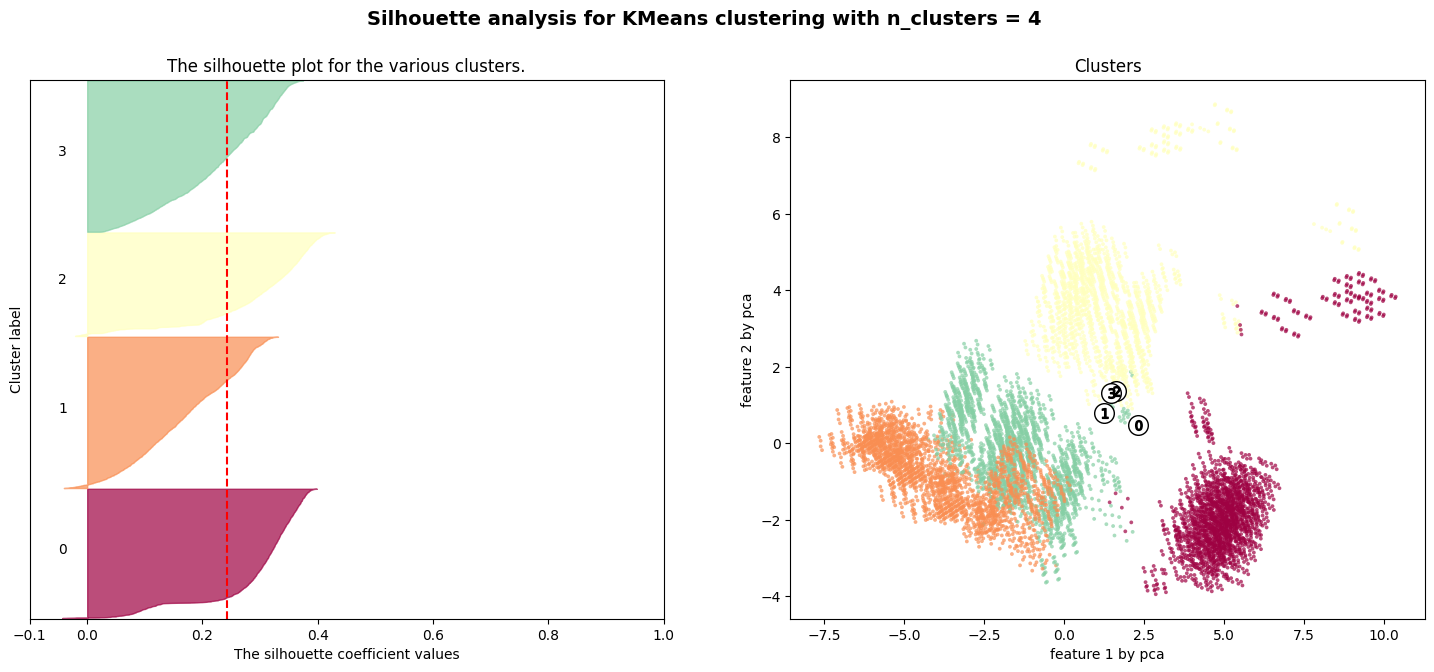

For n_clusters = 5 The average silhouette_score is : 0.2628357585432042


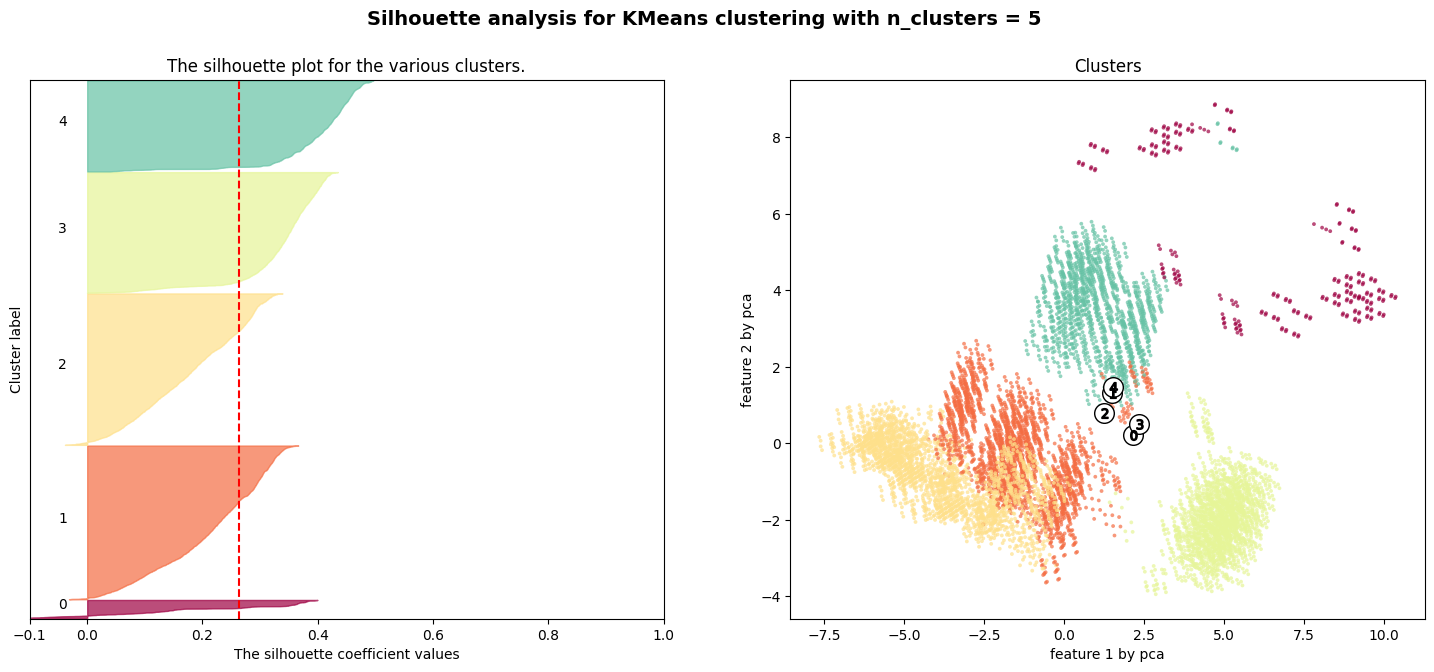

For n_clusters = 6 The average silhouette_score is : 0.2807107844485724


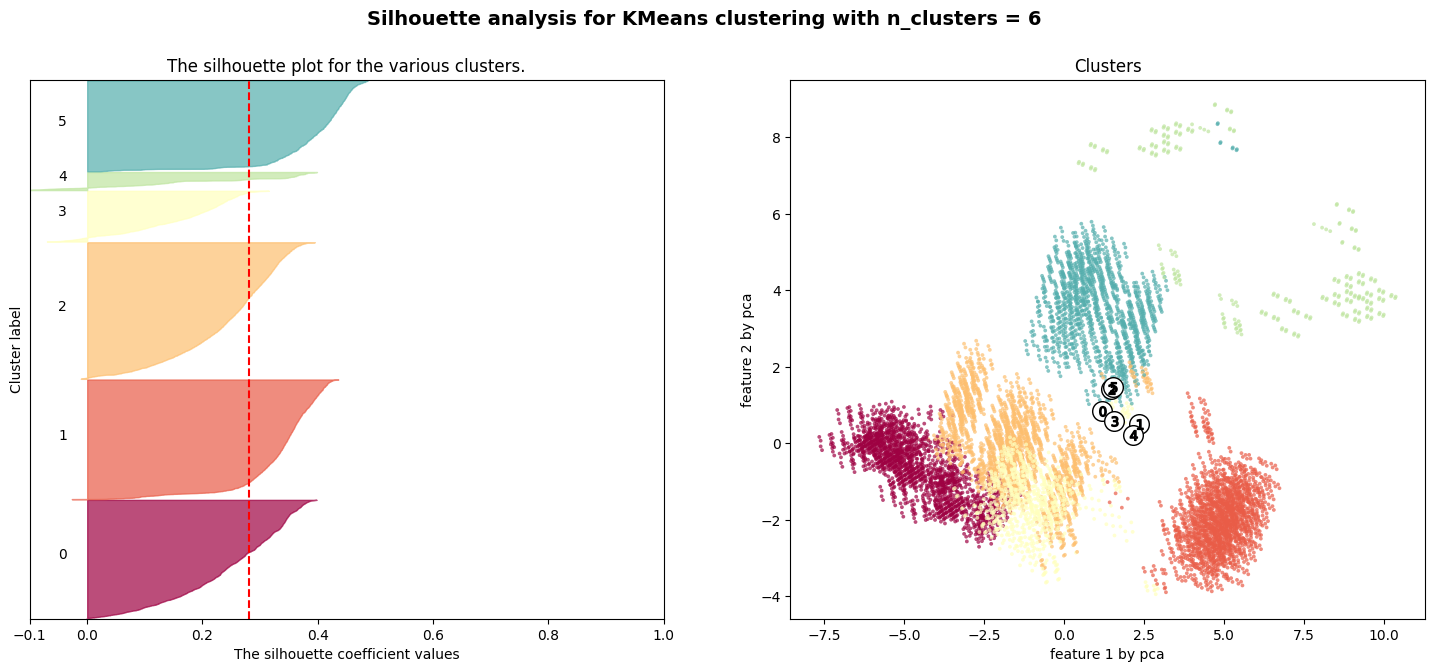

In [20]:
for n_clusters in range(2,7):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2d[:, 0], pca_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Clusters")
    ax2.set_xlabel("feature 1 by pca")
    ax2.set_ylabel("feature 2 by pca")

    plt.suptitle(("Silhouette analysis for KMeans clustering "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# As we can see although k=2 has the second highest avg silhouette score but it's samples are more uniform and thus, the appropriate value for k should indeed be 2 (edible , posionous)

In [21]:
kmeans = KMeans(n_clusters=2, init= 'k-means++')

In [22]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [23]:
Ypreds=kmeans.predict(X)

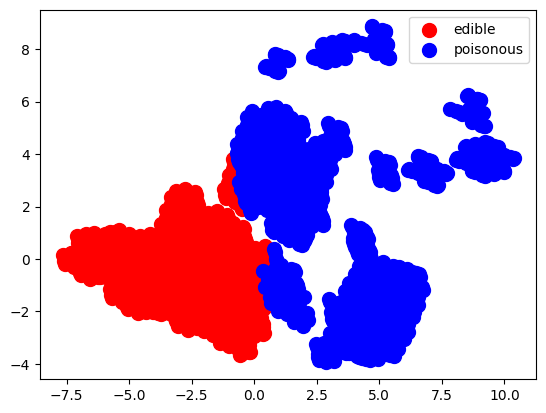

In [24]:
plt.scatter(pca_2d[Ypreds == 0, 0], pca_2d[Ypreds == 0, 1], s = 100, c = 'red', label = 'edible')
plt.scatter(pca_2d[Ypreds == 1, 0], pca_2d[Ypreds == 1, 1], s = 100, c = 'blue', label = 'poisonous')
plt.legend()